# Tutorial 1: The OceanDataset object

In [1]:
%matplotlib inline
import oceanspy as ospy
import xarray as xr
import numpy as np

/home/idies/workspace/Storage/malmans2/persistent/ESIP/oceanspy/oceanspy/plot.py:17: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  _matplotlib.use('agg')
/home/idies/workspace/Storage/malmans2/persistent/ESIP/oceanspy/oceanspy/animate.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  _matplotlib.use('agg')


## Opening an OceanDataset
All data sets available on SciServer can be opened using functions under `open_oceandataset`.  
Check out the online documentation or use the `help()` command.  
OceanSpy is meant to be user-friendly, so you can get a lot of information just using the `TAB` key.

In [2]:
# Type ospy.open_oceandataset. and push TAB

We've created a *get started* dataset. It's a sample from a high-resolution numerical simulation covering the east Greenland shelf, and the Iceland and Irminger Seas. 

In [3]:
oceandataset = ospy.open_oceandataset.get_started()

Opening [Getting Started with OceanSpy]:
[A small cutout from EGshelfIIseas2km_ASR.].


/home/idies/miniconda3/lib/python3.6/site-packages/dask/array/blockwise.py:204: UserWarning: The da.atop function has moved to da.blockwise
  warnings.warn("The da.atop function has moved to da.blockwise")


## The OceanDataset class
An OceanDataset contains all the attributes, information, and objects used by OceanSpy.

In [4]:
oceandataset

<oceanspy.OceanDataset>

Main attributes:
   .dataset: <xarray.Dataset>
   .grid: <xgcm.Grid>
   .projection: <cartopy.crs.Mercator object at 0x7feab5fc3bf8>

More attributes:
   .name: Getting Started with OceanSpy
   .description: A small cutout from EGshelfIIseas2km_ASR.
   .parameters: <class 'dict'>
   .grid_coords: <class 'dict'>

### Dataset
A dataset is a `xarray.Dataset` object that resamples a NetCDF file. It contains all the fields computed by the model. Check out the [xarray](http://xarray.pydata.org) documentation.

In [5]:
print(oceandataset.dataset)
print('\nTotal size: {}GB'.format(round(oceandataset.dataset.nbytes*1.E-9)))

<xarray.Dataset>
Dimensions:     (X: 341, Xp1: 342, Y: 262, Yp1: 263, Z: 139, Zl: 139, Zp1: 140, Zu: 139, time: 40, time_midp: 39)
Coordinates:
  * Z           (Z) float64 -1.0 -3.5 -7.0 ... -1.956e+03 -1.972e+03 -1.986e+03
  * Zp1         (Zp1) float64 0.0 -2.0 -5.0 ... -1.964e+03 -1.979e+03 -1.994e+03
  * Zu          (Zu) float64 -2.0 -5.0 -9.0 ... -1.964e+03 -1.979e+03 -1.994e+03
  * Zl          (Zl) float64 0.0 -2.0 -5.0 ... -1.949e+03 -1.964e+03 -1.979e+03
  * X           (X) float64 -29.98 -29.94 -29.89 -29.85 ... -15.12 -15.07 -15.03
  * Y           (Y) float64 66.01 66.03 66.05 66.07 ... 70.93 70.95 70.97 70.99
    XC          (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
    YC          (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
  * Xp1         (Xp1) float64 -30.0 -29.96 -29.92 -29.87 ... -15.1 -15.05 -15.01
    XU          (Y, Xp1) float64 dask.array<shape=(262, 342), chunksize=(262, 342)>
    YU          (Y, Xp1) float64 dask.array<

All the variables have several attributes such as units, description, dimensions, ...

In [6]:
print(oceandataset.dataset['Temp'])

<xarray.DataArray 'Temp' (time: 40, Z: 139, Y: 262, X: 341)>
dask.array<shape=(40, 139, 262, 341), dtype=float64, chunksize=(40, 139, 262, 341)>
Coordinates:
  * Z        (Z) float64 -1.0 -3.5 -7.0 ... -1.956e+03 -1.972e+03 -1.986e+03
  * X        (X) float64 -29.98 -29.94 -29.89 -29.85 ... -15.12 -15.07 -15.03
  * Y        (Y) float64 66.01 66.03 66.05 66.07 ... 70.93 70.95 70.97 70.99
    XC       (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
    YC       (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
  * time     (time) datetime64[ns] 2007-09-01 ... 2007-09-10T18:00:00
Attributes:
    units:            degC
    long_name:        potential_temperature
    coordinates:      XC YC RC iter
    original_output:  snapshot


### Grid
The numerical simulation was run using the Massachusetts Institute of Technology general circulation model (MITgcm). It's a finite volumes model that uses an Arakawa C grid. For this reason, fields with the same physical dimensions can be staggered in space. The Grid object is used by OceanSpy to regrid fields and compute operations that involve fields on different grid. Check out the [xgcm](https://xgcm.readthedocs.io) documentation.

In [7]:
oceandataset.grid

<xgcm.Grid>
time Axis (not periodic):
  * center   time_midp (39) --> outer
  * outer    time (40) --> center
X Axis (not periodic):
  * center   X (341) --> outer
  * outer    Xp1 (342) --> center
Z Axis (not periodic):
  * center   Z (139) --> left
  * left     Zl (139) --> center
  * outer    Zp1 (140) --> center
  * right    Zu (139) --> center
Y Axis (not periodic):
  * center   Y (262) --> outer
  * outer    Yp1 (263) --> center

### Others
The OceanDataset object contains several other attributes, such as parameters used by the model, labels, description, ... All the attributes can be changed using the `set` methods of the oceandataset. For example, we can change the name and the description associated with the oceandataset.

In [8]:
my_od = oceandataset.set_name('OceanDataset#1', overwrite=True)
my_od = my_od.set_description('This is my first OceanDataset', overwrite=True)
print(my_od)

<oceanspy.OceanDataset>

Main attributes:
   .dataset: <xarray.Dataset>
   .grid: <xgcm.Grid>
   .projection: <cartopy.crs.Mercator object at 0x7feaa869e0f8>

More attributes:
   .name: OceanDataset#1
   .description: This is my first OceanDataset
   .parameters: <class 'dict'>
   .grid_coords: <class 'dict'>


## Why do you need an OceanDataset?
All OceanSpy functions need an OceanDataset because it contains additional information than a regular dataset or a regular grid. 
For example, if you want to know the sea surface density anomaly on September 1st, there are 2 option:
1. The potential density computed by the model has been stored in the dataset
2. The potential density anomaly has not been stored and needs to be computed from the potential temperature and the salinity.
OceanSpy knows the physical meaning of every variable stored in the dataset, and knows how to compute missing variables from existing variables.

### Case 1: Requesting a missing variable
The potential density is not available in the dataset and need to be computed:

Cutting out the oceandataset.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.


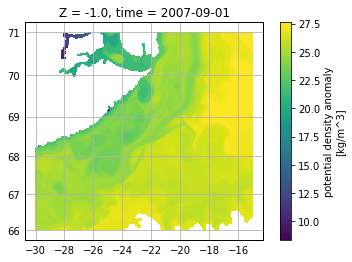

In [9]:
ax = my_od.plot.horizontal_section(varName='Sigma0', cutout_kwargs={'timeRange': '2007-09-01', 
                                                                    'ZRange'   : 0, 
                                                                    'dropAxes' :True})

Let's create a new oceandataset that includes potential density anomaly as well.

In [10]:
# Cutout and add Sigma0
my_od_wS0 = my_od.subsample.cutout(ZRange=0, timeRange='2007-09-01', dropAxes=True)
my_od_wS0 = my_od_wS0.compute.potential_density_anomaly()
print(my_od_wS0.dataset)

Cutting out the oceandataset.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
<xarray.Dataset>
Dimensions:     (X: 341, Xp1: 342, Y: 262, Yp1: 263, Z: 1, Zl: 1, Zp1: 1, Zu: 0, time: 1, time_midp: 1)
Coordinates:
  * X           (X) float64 -29.98 -29.94 -29.89 -29.85 ... -15.12 -15.07 -15.03
  * Y           (Y) float64 66.01 66.03 66.05 66.07 ... 70.93 70.95 70.97 70.99
  * Z           (Z) float64 -1.0
  * time        (time) datetime64[ns] 2007-09-01
  * Zp1         (Zp1) float64 0.0
  * Zu          (Zu) float64 
  * Zl          (Zl) float64 0.0
    XC          (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
    YC          (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
  * Xp1         (Xp1) float64 -30.0 -29.96 -29.92 -29.87 ... -15.1 -15.05 -15.01
    XU          (Y, Xp1) float64 dask.array<shape=(262, 342), chunksize=(262, 342)>
    YU          (Y, Xp1) float64 dask.array<shape=(262, 342), chunksize=(262

### Case 2: Requesting a variable already available
The potential density is available in the dataset, so there's no need to compute it.

Cutting out the oceandataset.


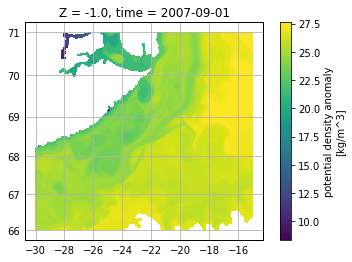

In [11]:
ax = my_od_wS0.plot.horizontal_section(varName='Sigma0')

You can take a dataset in and out of the OceanDataset as long as you don't lose the global attributes in the OceanDataset. Here is an example:

<oceanspy.OceanDataset>

Main attributes:
   .dataset: <xarray.Dataset>
   .grid: <xgcm.Grid>
   .projection: <cartopy.crs.Mercator object at 0x7fea98077728>

More attributes:
   .name: OceanDataset#2
   .description: It contains both vel and Sigma0
   .parameters: <class 'dict'>
   .grid_coords: <class 'dict'>
<xarray.Dataset>
Dimensions:     (X: 341, Xp1: 342, Y: 262, Yp1: 263, Z: 1, Zl: 1, Zp1: 1, Zu: 0, time: 1, time_midp: 1)
Coordinates:
  * X           (X) float64 -29.98 -29.94 -29.89 -29.85 ... -15.12 -15.07 -15.03
  * Y           (Y) float64 66.01 66.03 66.05 66.07 ... 70.93 70.95 70.97 70.99
  * Z           (Z) float64 -1.0
  * time        (time) datetime64[ns] 2007-09-01
  * Zp1         (Zp1) float64 0.0
  * Zu          (Zu) float64 
  * Zl          (Zl) float64 0.0
    XC          (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
    YC          (Y, X) float64 dask.array<shape=(262, 341), chunksize=(262, 341)>
  * Xp1         (Xp1) float64 -30.0 -29.96 -29.92

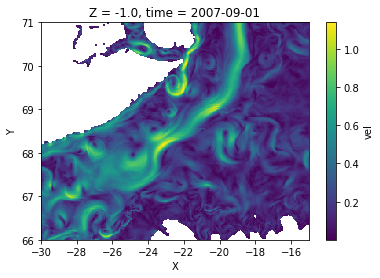

In [12]:
# Take ds and grid out of ds
ds   = my_od_wS0.dataset
grid = my_od_wS0.grid

# Compute velocity magnitude (regridding first) 
U = grid.interp(ds['U'], 'X')
V = grid.interp(ds['V'], 'Y')
ds['vel'] = np.sqrt(U**2+V**2)
ds['vel'].plot()

# Put it back it the OceanDataset
new_od = ospy.OceanDataset(ds)
new_od = new_od.set_name('OceanDataset#2', overwrite=True)
new_od = new_od.set_description('It contains both vel and Sigma0', overwrite=True)
print(new_od)
print(new_od.dataset)

OceanSpy's functions are enabled again. For example, you can compute the kinetic energy.

Cutting out the oceandataset.
Computing kinetic energy using the following parameters: {'eps_nh': 0}.


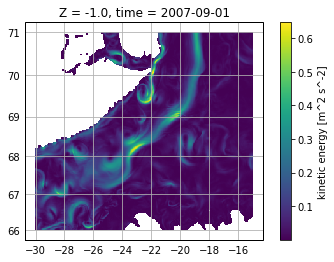

In [13]:
ax = new_od.plot.horizontal_section(varName='KE')

Thus, OceanSpy allows you also to store checkpoints, or to save files and transfer them on different workstations:

Cutting out the oceandataset.
Writing dataset to [checkpoint.nc].
[########################################] | 100% Completed |  0.2s
Opening dataset from [checkpoint.nc].
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Cutting out the oceandataset.


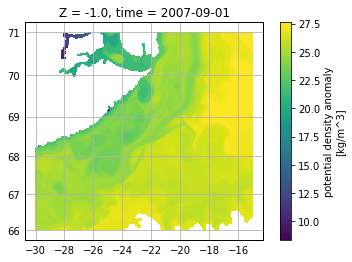

In [14]:
# Keep hydrography only
cut_od   = ospy.subsample.cutout(new_od, varList = ['Temp', 'S'])
cut_od   = cut_od.set_name('checkpoint', overwrite=True).set_description('Just hydrography', overwrite=True)
# Save to netcdf
filename = 'checkpoint.nc'
cut_od.to_netcdf(filename, engine='scipy')
# Re-open
opened_od = ospy.open_oceandataset.from_netcdf(filename)
# Compute Sigma0
opened_od = opened_od.compute.potential_density_anomaly()
ax = opened_od.plot.horizontal_section(varName='Sigma0')

Check out the documentation for more information about the OceanDataset attributes and methods.